<a href="https://colab.research.google.com/github/volpter/ML_comment_selection/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBoostClassifier

In [46]:
main_df = pd.read_csv('creditcard.csv')
main_df.shape

(284807, 31)

In [13]:
correl = main_df.drop(['Class'], axis = 1).corr()

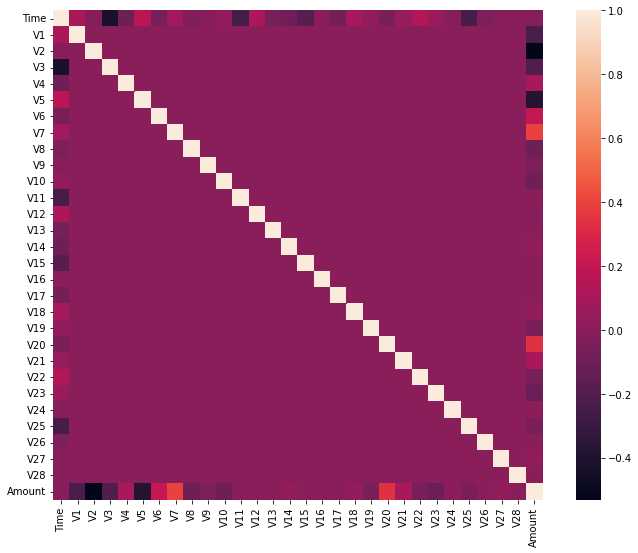

In [22]:
fig = plt.figure(figsize=(12, 9))
sns.heatmap(correl, square='True')
plt.show()

In [23]:
features = main_df.drop(['Class'], axis = 1)
labels = main_df.Class

In [24]:
train_X, test_X, train_y, test_y = train_test_split(features, labels, test_size = 0.3, random_state = 42 )


In [28]:
model = RandomForestClassifier(random_state = 42, class_weight = 'balanced')


In [ ]:
grid.fit(train_X, train_y)

In [31]:
model.fit(train_X, train_y)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [35]:
imp_s = pd.Series(model.feature_importances_, index = test_X.columns, name = 'importance')

In [41]:
imp = imp_s.sort_values(ascending=False)
imp

V14       0.176432
V10       0.108655
V4        0.105379
V12       0.103484
V17       0.090405
V3        0.059854
V16       0.047956
V11       0.046531
V2        0.036369
V7        0.026177
V9        0.022526
V21       0.016957
V19       0.016070
V18       0.011795
V5        0.011722
Amount    0.011660
V8        0.011346
V27       0.010817
V1        0.009850
V20       0.009400
V6        0.008673
V15       0.008093
V26       0.008085
V23       0.006938
V13       0.006627
V28       0.006340
V22       0.005910
V25       0.005820
Time      0.005399
V24       0.004729
Name: importance, dtype: float64

0.999602073897218
0.9553571428571429
0.7867647058823529


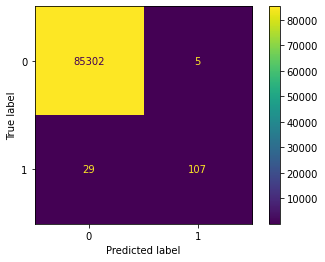

In [40]:
pred = model.predict(test_X)
print (accuracy_score(test_y, pred))
print (precision_score(test_y, pred))
print (recall_score(test_y, pred))
ConfusionMatrixDisplay.from_predictions(test_y, pred)

In [51]:
main_features = list(imp.index[:10])
main_features.append('Class')
optimal_data = main_df[main_features]

In [53]:
opt_train_X, opt_test_X, opt_train_y, opt_test_y = train_test_split(optimal_data.drop(['Class'], axis = 1), optimal_data.Class, 
                                                                                      test_size = 0.3, random_state = 42)

In [54]:
model_opt = RandomForestClassifier(random_state = 42, class_weight = 'balanced')

In [55]:
model_opt.fit(opt_train_X, opt_train_y)

RandomForestClassifier(class_weight='balanced', random_state=42)

0.9996254813150287
0.9642857142857143
0.7941176470588235


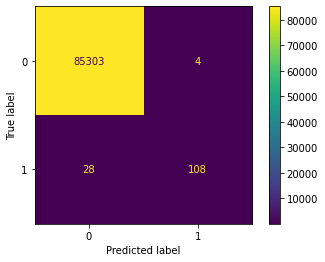

In [57]:
pred_opt = model_opt.predict(opt_test_X)
print (accuracy_score(opt_test_y, pred_opt))
print (precision_score(opt_test_y, pred_opt))
print (recall_score(opt_test_y, pred_opt))
ConfusionMatrixDisplay.from_predictions(opt_test_y, pred_opt)

In [61]:
model_opt_2 = RandomForestClassifier(random_state = 42, class_weight = 'balanced')
param = {'criterion': ['gini', 'entropy'], 
         #'max_depth': [5, 7], 
         #'min_samples_split': [2, 5],
         'max_features': ['log2', 'sqrt'],
         'n_estimators': [ 10, 25, 100]
}
grid = GridSearchCV(model_opt_2, param, verbose = 2)


In [62]:
grid.fit(opt_train_X, opt_train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .criterion=gini, max_features=log2, n_estimators=10; total time=   5.9s
[CV] END .criterion=gini, max_features=log2, n_estimators=10; total time=   6.7s
[CV] END .criterion=gini, max_features=log2, n_estimators=10; total time=   5.3s
[CV] END .criterion=gini, max_features=log2, n_estimators=10; total time=   4.4s
[CV] END .criterion=gini, max_features=log2, n_estimators=10; total time=   4.5s
[CV] END .criterion=gini, max_features=log2, n_estimators=25; total time=  10.7s
[CV] END .criterion=gini, max_features=log2, n_estimators=25; total time=  10.3s
[CV] END .criterion=gini, max_features=log2, n_estimators=25; total time=  11.3s
[CV] END .criterion=gini, max_features=log2, n_estimators=25; total time=  11.5s
[CV] END .criterion=gini, max_features=log2, n_estimators=25; total time=  10.7s
[CV] END criterion=gini, max_features=log2, n_estimators=100; total time=  41.4s
[CV] END criterion=gini, max_features=log2, n_es

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [10, 25, 100]},
             verbose=2)

0.9996254813150287
0.9642857142857143
0.7941176470588235


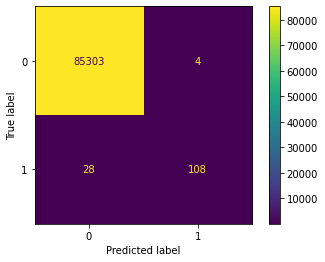

In [63]:
Omodel = grid.best_estimator_
Opred = Omodel.predict(opt_test_X)
print (accuracy_score(opt_test_y, pred_opt))
print (precision_score(opt_test_y, pred_opt))
print (recall_score(opt_test_y, pred_opt))
ConfusionMatrixDisplay.from_predictions(opt_test_y, pred_opt)

In [64]:
grid.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 100}